# LifeWatch publication Statistics per publication type

This jupyter notebook contains statistics relating to types of publications of within the LifeWatch project.

(In the standardized data, this information is included in the columns 'DocType', 'LitStyles', 'ThesisDegree')

#### Import and load the data

In [1]:
import os
import pandas as pd

In [2]:
# Specify location of data:
datafolder = "LW_publications_standardized" 
datafiles = ["LWpubs_stand_0_500.csv", 
             "LWpubs_stand_500_1000.csv", 
             "LWpubs_stand_1000_1500.csv", 
             "LWpubs_stand_1500_2000.csv", 
             "LWpubs_stand_2000_2500.csv",
             "LWpubs_stand_2500_3000.csv",
             "LWpubs_stand_3000_3500.csv",
             "LWpubs_stand_3500_4000.csv",
             "LWpubs_stand_4000_4500.csv",
             "LWpubs_stand_4500_5000.csv",
             "LWpubs_stand_5000_5500.csv",
             "LWpubs_stand_5500_6000.csv",
             "LWpubs_stand_6000_6227.csv"]

# Load data into single dataframe
appended_data = []
for datafile in datafiles:
    data_loc = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), datafolder, datafile)
    data = pd.read_csv(data_loc)
    data.rename(columns={'SortDate': 'Year'}, inplace=True)
    appended_data.append(data)
    
data = pd.concat(appended_data)

# Exclude publications from 2022:
data = data[data['Year']<2022]

# Set correct types
data['BrefID'] = data['BrefID'].astype("category")
data['Year'] = data['Year'].astype("category")
#data.info()

#### Number of publications for each publication type:

In [10]:
#Number of publications for each type:
data = data.rename(columns={'BrefID': 'Publications'})
pt = data[['Publications', 'DocType', 'LitStyles']]

In [33]:
pt_summ = pt.groupby(['DocType', 'LitStyles'], dropna=False, as_index=True).nunique('Publications').sort_values('Publications')
pt_summ

Publications
DocType         LitStyles                     
Reports         Advice text                  1
Book/Monograph  Conference paper             1
Journal article Corrigendum                  1
Book/Monograph  Final report                 1
                Press                        1
Ephemera        NaN                          1
Reports         Annual report                2
Book/Monograph  Summary                      2
Ephemera        Presentation                 3
Reports         Project report               3
Book/Monograph  Advice text                  3
Journal article Conference paper             3
Ephemera        Press                        4
NaN             NaN                          5
Book/Monograph  Conference                   8
Journal         NaN                          9
Journal article Summary                      9
Reports         Final report                11
Ephemera        Poster                      14
Book chapters   Conference paper            30
Data paper      NaN                         58
Reports         NaN                        121
Book chapters   Summary                    123
Book/Monograph  NaN                        145
Book chapters   NaN                        350
Book/Monograph  Dissertation               383
Journal article NaN                       4931

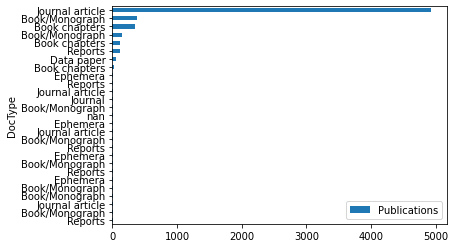

In [14]:
#graph of DocTypes:
pt_summ.reset_index(level=['DocType', 'LitStyles'], inplace=True) 
pt_summ.plot.barh(x='DocType', y='Publications').legend(loc='lower right')

#### Number of theses:

In [35]:
dissertation_all = data.loc[data['LitStyles'] == 'Dissertation']
dissertation_all = dissertation_all[['Publications','ThesisDegree']]
dissertation_all

,Publications,ThesisDegree
9,215856,MSc
11,216520,MSc
13,216722,BA
14,216932,PhD
41,222790,PhD
...,...,...
203,347461,BSc
204,347463,MA
205,347464,MSc
206,347465,MA


In [36]:
dissertation_all_summ_year = dissertation_all.groupby(['ThesisDegree'], dropna=True).nunique('Publications')
dissertation_all_summ_year

,Publications
ThesisDegree,
BA,22
BSc,18
Graduate,9
Ir,3
MA,42
MSc,147
PhD,136
Postgraduate,1


#### Number of Belgian theses:

In [44]:
dissertation_all = data.loc[data['LitStyles'] == 'Dissertation']
dissertation_bel = dissertation_all.loc[dissertation_all['stand_country'] == 'Belgium']
dissertation_bel = dissertation_bel[['Publications','ThesisDegree']]
#dissertation_bel

In [45]:
dissertation_bel_summ = dissertation_bel.groupby('ThesisDegree', dropna=False).nunique('Publications')
dissertation_bel_summ[['Publications']].T

ThesisDegree,BA,MA,MSc,PhD,NaN
Publications,1,5,19,14,2


#### Number of Flemish theses:

In [47]:
dissertation_all = data.loc[data['LitStyles'] == 'Dissertation']
dissertation_flem = dissertation_all.loc[dissertation_all['stand_flemish'] == 'x']
dissertation_flem = dissertation_flem[['Publications','ThesisDegree']]
dissertation_flem

,Publications,ThesisDegree
76,228661,PhD
86,229063,PhD
87,229064,PhD
115,233208,MSc
181,239424,BA
276,245719,MSc
329,248760,PhD
337,249767,PhD
355,250881,PhD
68,261448,MSc


In [48]:
dissertation_flem_summ = dissertation_flem.groupby('ThesisDegree',dropna=False).nunique('Publications')
dissertation_flem_summ[['Publications']].T

ThesisDegree,BA,MA,MSc,PhD,NaN
Publications,1,1,14,13,2
